# Week 4 - Architecture Implementation-Cats and Dogs

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-08-14 14:58:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   172MB/s    in 0.4s    

2024-08-14 14:58:27 (172 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
pwd

'/content'

### Extracting files and storing in the directory

In [1]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with the preprocessing function
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)
#so if gray scale just write in generator to have gray scale it will work


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Viewing images from the directory

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.195.jpg', 'cat.614.jpg', 'cat.977.jpg', 'cat.741.jpg', 'cat.655.jpg', 'cat.486.jpg', 'cat.804.jpg', 'cat.449.jpg', 'cat.505.jpg', 'cat.190.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


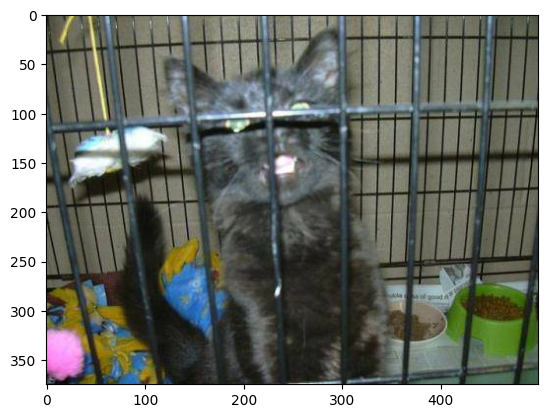

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [17]:
im = mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0]))
im.shape

(375, 499, 3)

# LENET Architecture Implementation

In [18]:
#Implementing the Lenet Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
lenetcnn = Sequential()
lenetcnn.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh',padding="same",input_shape=(28,28,1)))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh',padding='valid'))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Flatten())
lenetcnn.add(Dense(120, activation='tanh'))
lenetcnn.add(Dense(84, activation='tanh'))
lenetcnn.add(Dense(1, activation='sigmoid'))
lenetcnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,941 (238.05 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
lenetcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

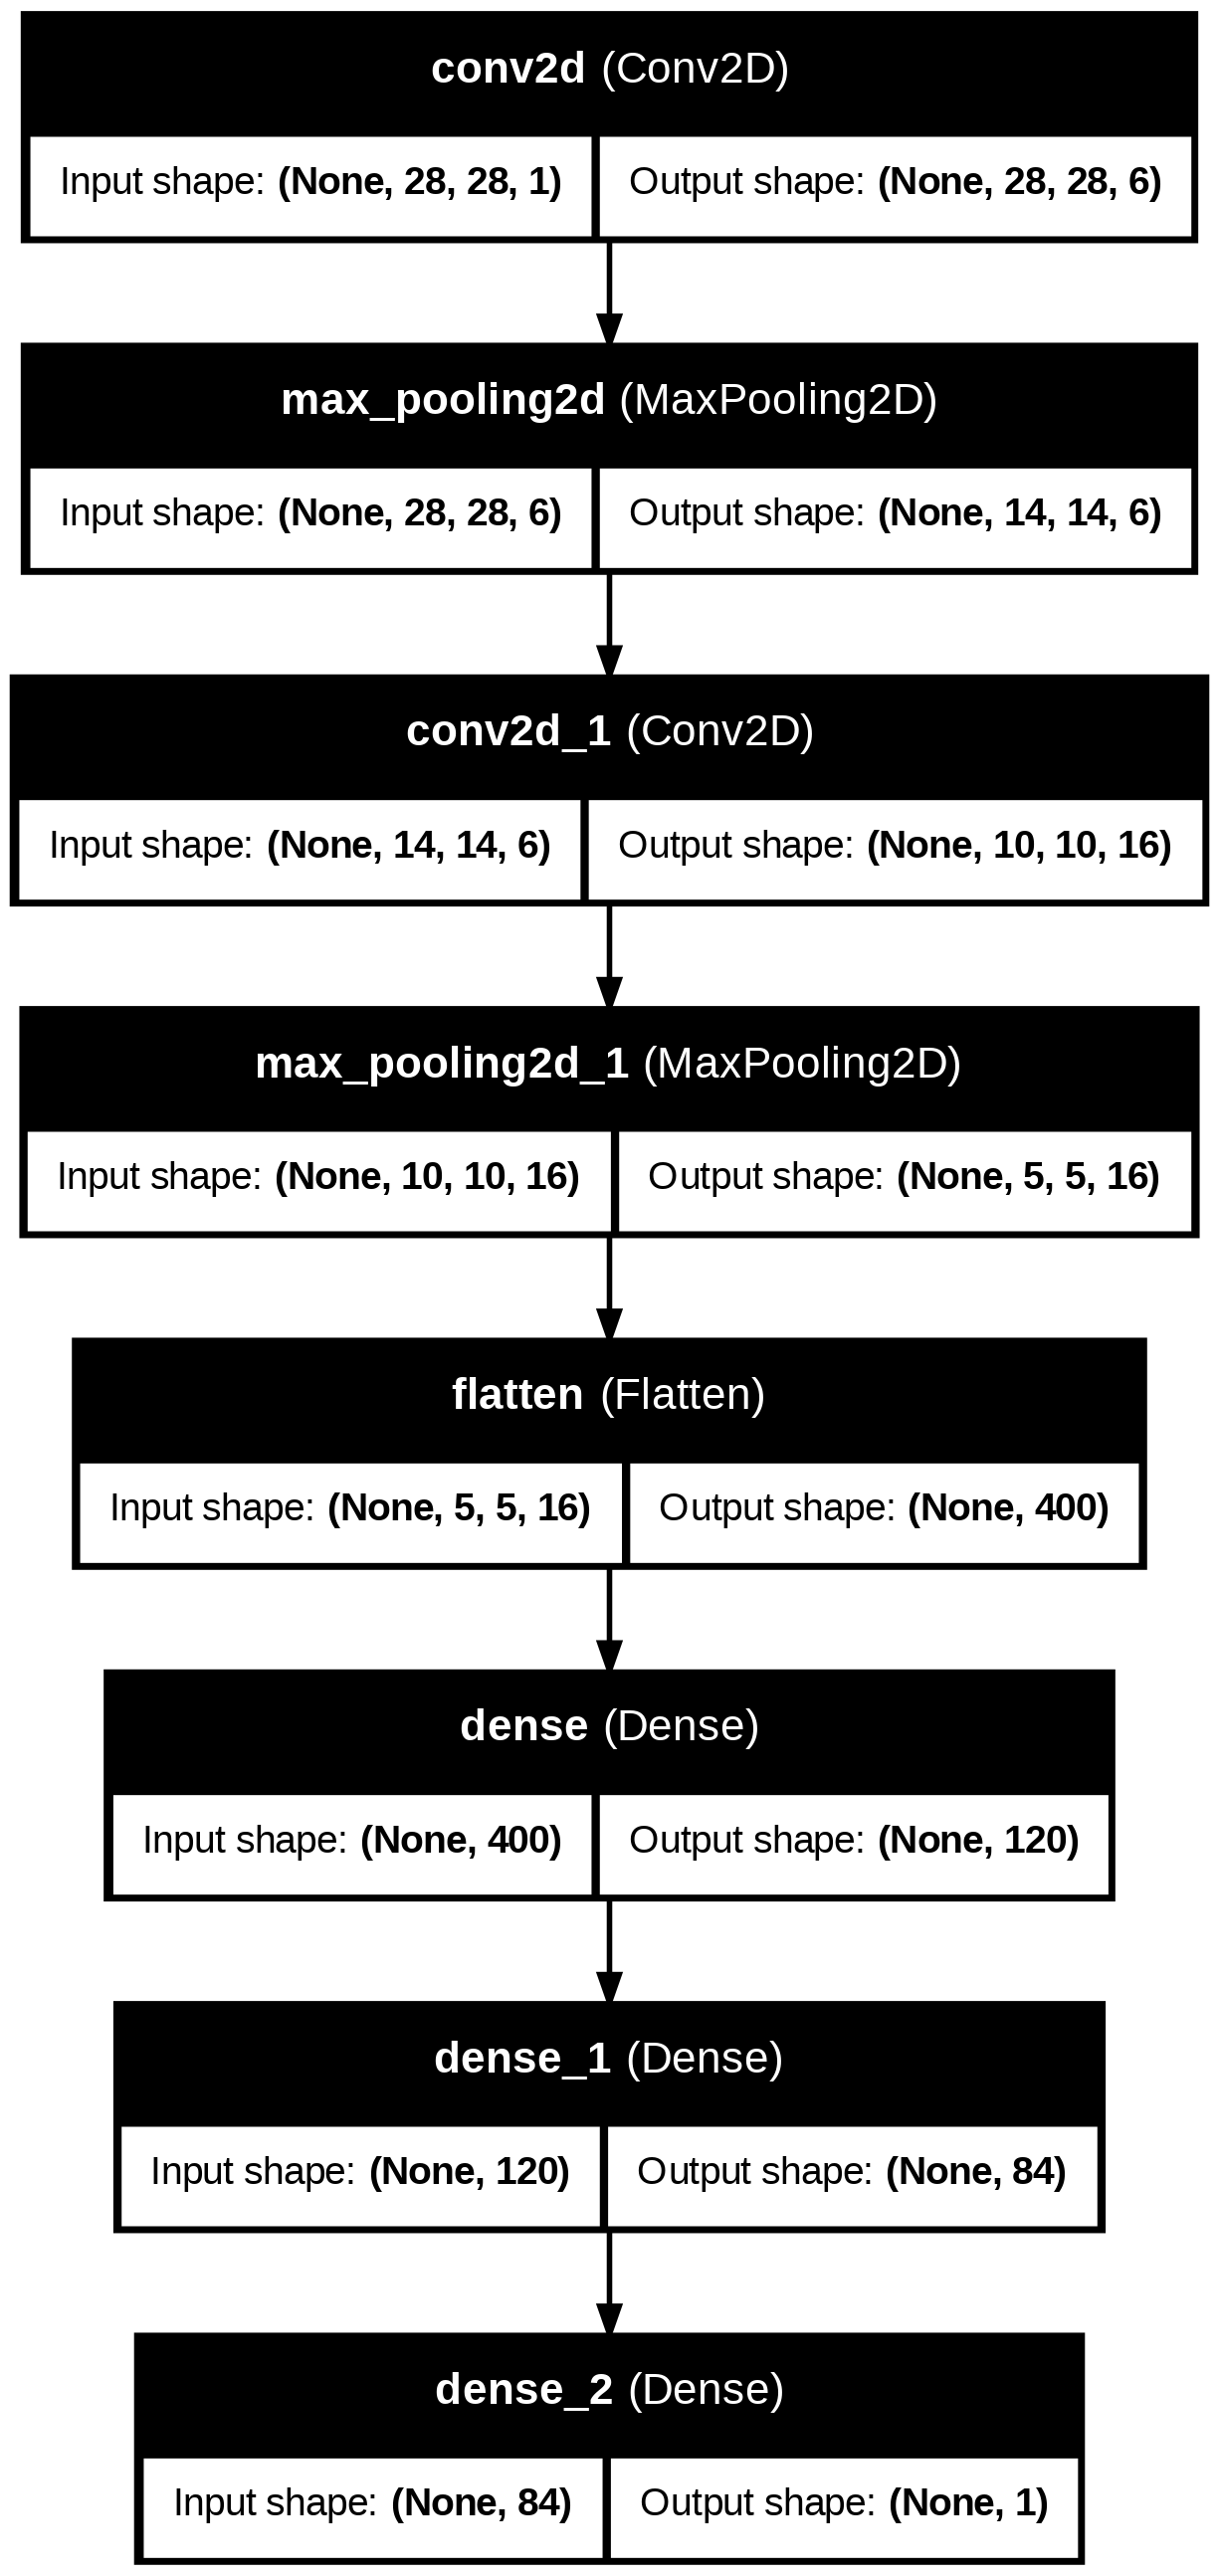

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(lenetcnn,  show_shapes=True, show_layer_names=True)

In [20]:
#fitting the model
history = lenetcnn.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.5591 - loss: 0.6874 - val_accuracy: 0.5960 - val_loss: 0.6678
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.6413 - loss: 0.6494 - val_accuracy: 0.6090 - val_loss: 0.6681
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6617 - loss: 0.6230 - val_accuracy: 0.6310 - val_loss: 0.6655
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.7232 - loss: 0.5680 - val_accuracy: 0.6210 - val_loss: 0.6842
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.7231 - loss: 0.5413 - val_accuracy: 0.6430 - val_loss: 0.7037
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.7702 - loss: 0.4817 - val_accuracy: 0.6370 - val_loss: 0.7172
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8005 - loss: 0.4379 - val_accuracy: 0.6280 - val_loss: 0.7282
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8515 - loss: 0.3553 - val_accuracy: 0.6100 - val_loss:

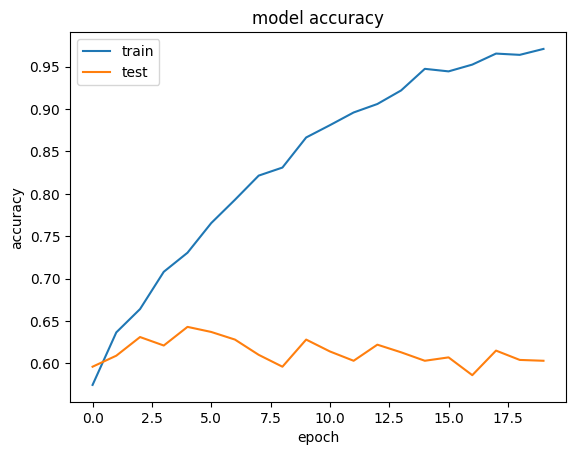

In [21]:
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

##### we can see that the model has overfitted

# AlexNet Architecture implementation

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
alexnet = Sequential()
alexnet.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= (227,227,3),
                        kernel_initializer= 'he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))
alexnet.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

alexnet.add(Conv2D(384, kernel_size=(3,3), strides= 1,
              padding= 'same', activation= 'relu',
              kernel_initializer= 'he_normal'))

alexnet.add(Conv2D(384, kernel_size=(3,3), strides= 1,
              padding= 'same', activation= 'relu',
              kernel_initializer= 'he_normal'))

alexnet.add(Conv2D(256, kernel_size=(3,3), strides= 1,
              padding= 'same', activation= 'relu',
              kernel_initializer= 'he_normal'))

alexnet.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                    padding= 'valid', data_format= None))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation= 'relu'))
alexnet.add(Dense(4096, activation= 'relu'))
alexnet.add(Dense(1000, activation= 'relu'))
alexnet.add(Dense(1, activation= 'sigmoid'))#actual it is softmax but we are doing a binary classification so sigmoid with 1
alexnet.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,379,345 (237.96 MB)

 Trainable params: 62,379,345 (237.96 MB)

 Non-trainable params: 0 (0.00 B)

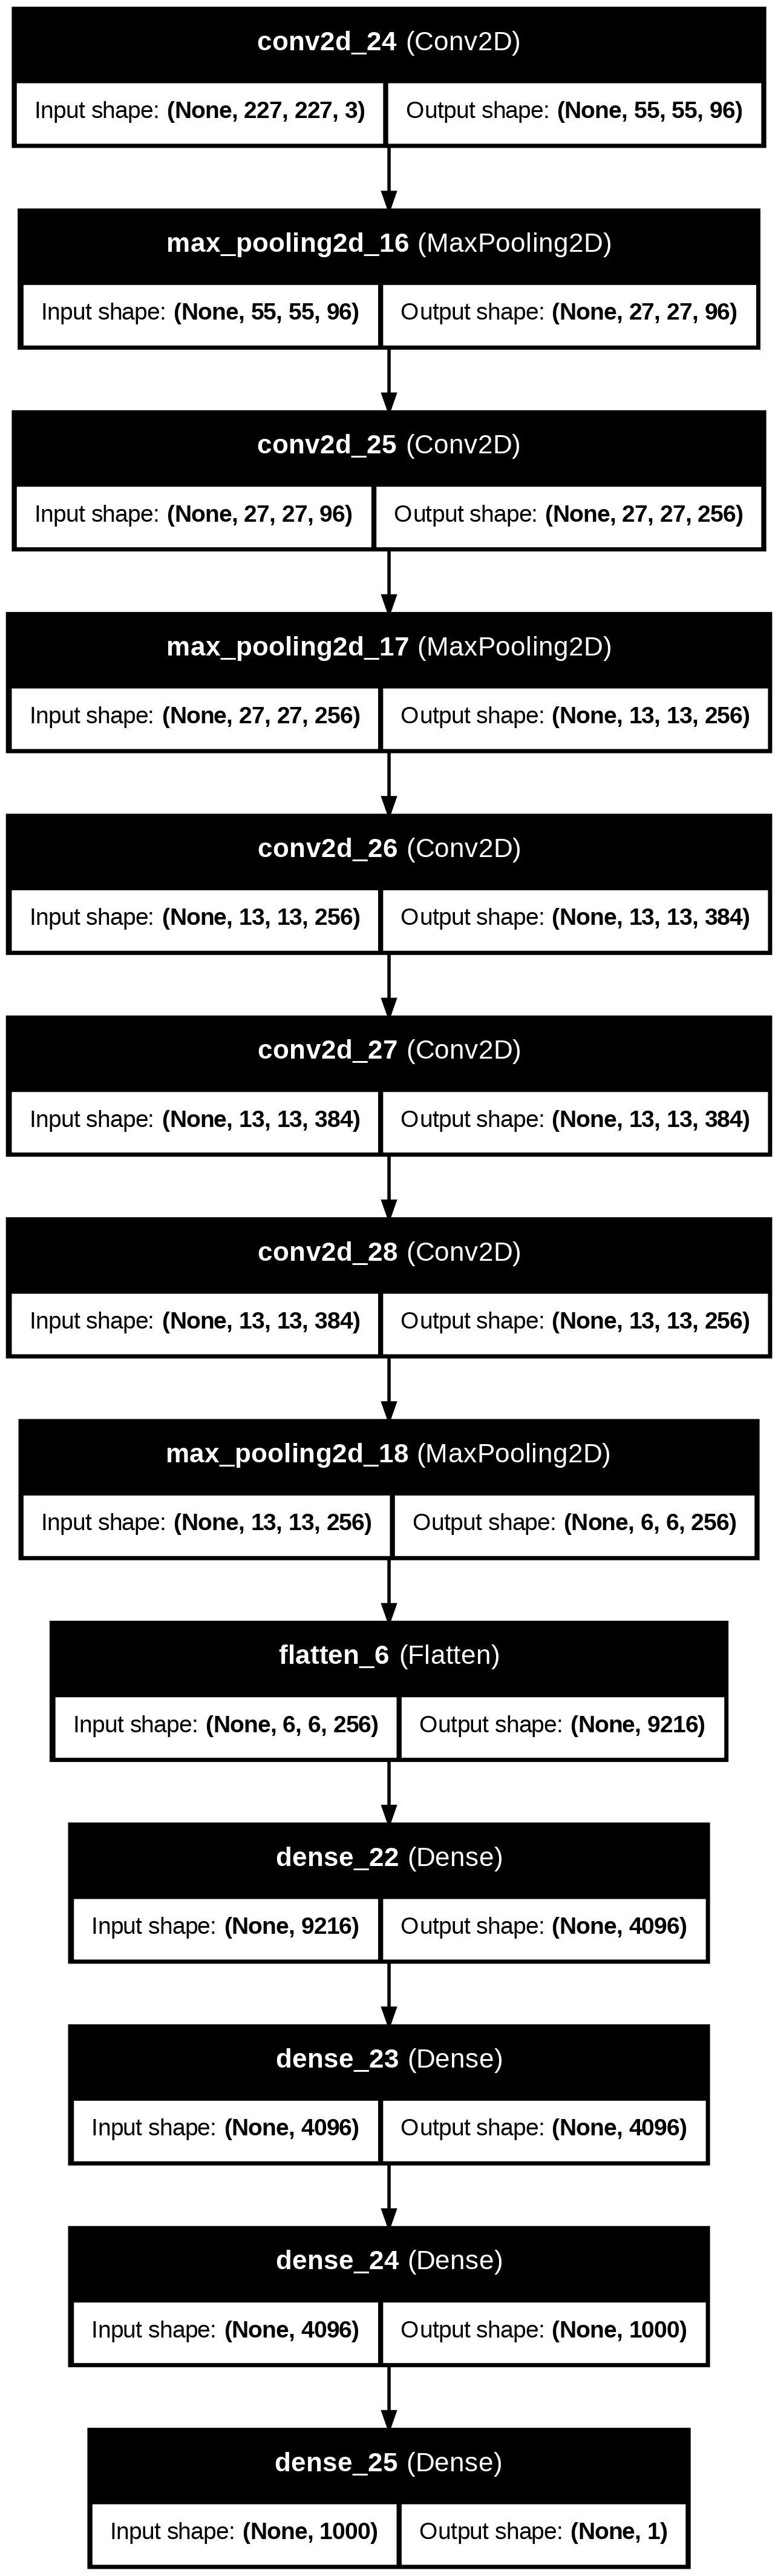

In [44]:
#model plot
from tensorflow.keras.utils import plot_model
plot_model(alexnet,  show_shapes=True, show_layer_names=True)

In [45]:
alexnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = alexnet.fit(train_generator, epochs=20, valictual it is softmax but we are doing a binary classification so sigmoid with 1
alexnet.summary()dation_data=val_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step - accuracy: 0.5109 - loss: 26.1327 - val_accuracy: 0.5890 - val_loss: 0.6884
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.5092 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.4941 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.5063 - loss: 0.6979 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.4898 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.4963 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.5014 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.4876 - loss: 0.6933 - val_accuracy: 0.5000 - 

##### we can see a lower accuracy obtained

### improving the alexnet architecture

In [47]:
# using data agumentation to get better result
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data does not need augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

alexnet = Sequential()
alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                   padding='valid', activation='relu',
                   input_shape=(227, 227, 3),
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))
alexnet.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(1000, activation='relu'))
alexnet.add(Dense(1, activation='sigmoid'))  # Binary classification

alexnet.summary()

# Optionally, switch to SGD for training
optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Use SGD if desired
alexnet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = alexnet.fit(train_generator, epochs=20, validation_data=val_generator)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,379,345 (237.96 MB)

 Trainable params: 62,379,345 (237.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - accuracy: 0.5142 - loss: 0.7714 - val_accuracy: 0.5010 - val_loss: 0.6862
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 396ms/step - accuracy: 0.5261 - loss: 0.6897 - val_accuracy: 0.5040 - val_loss: 0.6837
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 394ms/step - accuracy: 0.5293 - loss: 0.6850 - val_accuracy: 0.5700 - val_loss: 0.6807
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 408ms/step - accuracy: 0.5727 - loss: 0.6769 - val_accuracy: 0.6370 - val_loss: 0.6650
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 404ms/step - accuracy: 0.5610 - loss: 0.6826 - val_accuracy: 0.5720 - val_loss: 0.6730
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 402ms/step - accuracy: 0.6145 - loss: 0.6711 - val_accuracy: 0.5630 - val_loss: 0.6735
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 396ms/step - accuracy: 0.5776 - loss: 0.6794 - val_accuracy: 0.6640 - val_loss: 0.6226
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 393ms/step - accuracy: 0.6056 - loss: 0.6594 - val_accuracy: 0.655

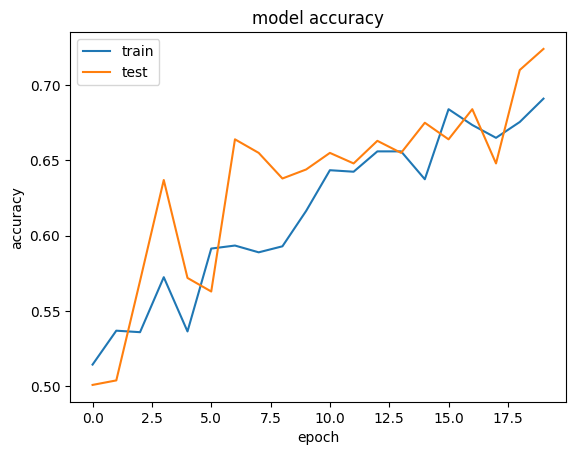

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#got a more less overfit model even though a bit less accuracy

#### the results now are better with not so much overfit and better accuracy obtained